For Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


In [3]:
pip install -U spacy

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install -U spacy

In [5]:
!python -m spacy download en

     --------------------------------------- 12.8/12.8 MB 18.2 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
musk = pd.read_csv('Elon_musk.csv', encoding = 'ISO-8859-1')
musk

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [8]:
musk.drop(['Unnamed: 0'], inplace = True, axis =1)
musk

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

# Text Preprocessing

In [9]:
musk = [Text.strip() for Text in musk.Text]
musk = [Text for Text in musk if Text]
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [10]:
data = ' '.join(musk)
data

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [11]:
import string
no_punc_text = data.translate(str.maketrans('','',string.punctuation))
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [12]:
import re
no_url_text = re.sub(r'http\S+','', no_punc_text)
no_url_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that won\x92t give you your private keys should

In [13]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(no_url_text)
tokens

['kunalb11',
 'I\x92m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'kanyewest',
 'geoffkei

In [15]:
len(tokens)

20423

In [16]:
from nltk.corpus import stopwords
stopword = stopwords.words('english')
stopword.append('the')
no_stop_tokens = [word for word in tokens if not word in stopword]
no_stop_tokens

['kunalb11',
 'I\x92m',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have',
 'tried',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'next',
 'even',
 'Happy',
 'New',
 'Year',
 'Ox',
 'Frodo',
 'underdoge',
 'All',
 'thought',
 'would',
 'fail',
 'Himself',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'entertaining',
 'outcome',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'Just',
 'agree',
 'Clubhouse',
 'kanyewest',
 'geoffkeighley',
 'UnrealEngine',
 'It\x92s',
 'getting',
 'real',
 'Bought',
 'Dogecoin',
 'lil',
 'X',
 'toddler',
 'hodler',
 'JoshManMode',
 'He',
 'definitely',
 'issues',
 'sentencing',
 'seems',
 'bit',
 'high',
 'freewalletorg',
 'Thanks',
 '

In [17]:
len(no_stop_tokens)

15096

In [18]:
lower_word  = [x.lower() for x in no_stop_tokens]
lower_word

['kunalb11',
 'i\x92m',
 'alien',
 'idaacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tried',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera27',
 'doge',
 'underestimated',
 'teslacn',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'owensparks',
 'flcnhvy',
 'anonyx10',
 'haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'indeed',
 'tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'givedirectly',
 'just',
 'sent',
 'just',
 'agree',
 'clubhouse',
 'kanyewest',
 'geoffkeighley',
 'unrealengine',
 'it\x92s',
 'getting',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'joshmanmode',
 'he',
 'definitely',
 'issues',
 'sentencing',
 'seems',
 'bit',
 'high',
 'freewalletorg',
 'thanks',
 '

In [19]:
len(lower_word)

15096

In [21]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_word]
stemmed_tokens

['kunalb11',
 'i\x92m',
 'alien',
 'idaacarmack',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 'joerogan',
 'spotifi',
 'great',
 'interview',
 'gtera27',
 'doge',
 'underestim',
 'teslacn',
 'congratul',
 'tesla',
 'china',
 'amaz',
 'execut',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happi',
 'new',
 'year',
 'ox',
 'frodo',
 'underdog',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'owenspark',
 'flcnhvi',
 'anonyx10',
 'haha',
 'thank',
 'flcnhvi',
 'anonyx10',
 'inde',
 'tweet',
 'definit',
 'repres',
 'realworld',
 'time',
 'alloc',
 'the',
 'entertain',
 'outcom',
 'like',
 'givedirectli',
 'just',
 'sent',
 'just',
 'agre',
 'clubhous',
 'kanyewest',
 'geoffkeighley',
 'unrealengin',
 'it\x92',
 'get',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'joshmanmod',
 'he',
 'definit',
 'issu',
 'sentenc',
 'seem',
 'bit',
 'high',
 'freewalletorg',
 'thank',
 'fix',
 'freewalletorg',
 'pleas',
 'unlock',
 'account',
 'ast

In [22]:
len(stemmed_tokens)

15096

In [24]:
lemma = [token.lemma_ for token in doc]
lemma

['kunalb11',
 'i\x92m',
 'alien',
 'idaacarmack',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'try',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera27',
 'doge',
 'underestimate',
 'teslacn',
 'congratulation',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'owenspark',
 'flcnhvy',
 'anonyx10',
 'haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'indeed',
 'tweet',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'givedirectly',
 'just',
 'send',
 'just',
 'agree',
 'clubhouse',
 'kanyewest',
 'geoffkeighley',
 'unrealengine',
 'it\x92s',
 'get',
 'real',
 'buy',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'joshmanmode',
 'he',
 'definitely',
 'issue',
 'sentencing',
 'seem',
 'bit',
 'high',
 'freewalletorg',
 'thank',
 'fix',
 'freewallet

In [25]:
len(lemma)

15123

In [40]:
clean_tweets = ' '.join(lemma)
clean_tweets

'kunalb11 i\x92m alien idaacarmack ray trace cyberpunk hdr nextlevel have try joerogan spotify great interview gtera27 doge underestimate teslacn congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owenspark flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweet definitely represent realworld time allocation the entertaining outcome likely givedirectly just send just agree clubhouse kanyewest geoffkeighley unrealengine it\x92s get real buy dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power haha freewalletorg any crypto wallet won\x92t give private key avoid cost freewalletorg your app suck rt spacex nasa select falcon heavy launch first two element lunar gateway together one mission ajtourville yes blkmdl3 rationaletienne adamklotz once predict cash flow reasona

# Feature Extraction

# 1.Using CountVectorizer

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemma)

In [42]:
vectorizer.vocabulary_

{'kunalb11': 2039,
 'alien': 229,
 'idaacarmack': 1779,
 'ray': 2944,
 'trace': 3810,
 'cyberpunk': 960,
 'hdr': 1667,
 'nextlevel': 2487,
 'have': 1661,
 'try': 3845,
 'joerogan': 1960,
 'spotify': 3436,
 'great': 1600,
 'interview': 1889,
 'gtera27': 1618,
 'doge': 1111,
 'underestimate': 3975,
 'teslacn': 3656,
 'congratulation': 853,
 'tesla': 3650,
 'china': 738,
 'amazing': 255,
 'execution': 1322,
 'last': 2056,
 'year': 4246,
 'now': 2526,
 'next': 2486,
 'even': 1293,
 'happy': 1648,
 'new': 2483,
 'ox': 2644,
 'frodo': 1486,
 'underdoge': 3974,
 'all': 232,
 'thought': 3734,
 'would': 4221,
 'fail': 1358,
 'himself': 1713,
 'owenspark': 2640,
 'flcnhvy': 1428,
 'anonyx10': 284,
 'haha': 1633,
 'thanks': 3693,
 'indeed': 1828,
 'tweet': 3864,
 'definitely': 1014,
 'represent': 3026,
 'realworld': 2969,
 'time': 3752,
 'allocation': 234,
 'the': 3700,
 'entertaining': 1250,
 'outcome': 2620,
 'likely': 2117,
 'givedirectly': 1570,
 'just': 1987,
 'send': 3210,
 'agree': 200,
 '

In [43]:
vectorizer.get_feature_names()

['005',
 '10',
 '100',
 '1000',
 '10000',
 '107',
 '10x',
 '11',
 '112',
 '11thhour',
 '12',
 '122',
 '13',
 '130pm',
 '13arm13arm',
 '13ericralph31',
 '14',
 '140pm',
 '149watt',
 '14yearold',
 '15',
 '150',
 '155',
 '16',
 '162',
 '17',
 '18',
 '1880s',
 '1b',
 '1matthewgarcia',
 '1st',
 '1stprinciples4l',
 '20',
 '200',
 '2007',
 '2008',
 '2009',
 '2012',
 '2017',
 '2020',
 '2021',
 '2024',
 '2026',
 '2030',
 '20k',
 '210',
 '218',
 '21st',
 '22',
 '225',
 '23',
 '230',
 '24',
 '240am',
 '247teslanews',
 '25',
 '250',
 '250kw',
 '25d',
 '25gunsteslacom',
 '25k',
 '25th',
 '28',
 '28delayslater',
 '28th',
 '29',
 '2k',
 '2nd',
 '2v',
 '30',
 '300',
 '301',
 '304',
 '304l',
 '31',
 '33',
 '330',
 '360',
 '37',
 '3800',
 '394',
 '39a',
 '3d',
 '3rd',
 '40',
 '400',
 '42',
 '420',
 '4227',
 '430',
 '43rd',
 '445pm',
 '448',
 '4530000',
 '45thspacewing',
 '4680',
 '479000',
 '48',
 '4d',
 '4th',
 '4thfromourstar',
 '50',
 '50000',
 '50k',
 '60',
 '60000',
 '65',
 '69420',
 '6f',
 '6k',
 

In [44]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
X.toarray().shape

(15123, 4278)

# 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [47]:
cv_ngram_range = CountVectorizer(analyzer = 'word', ngram_range=(1,3),max_features= 100)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemma)

In [48]:
print(cv_ngram_range.get_feature_names())
bow_matrix_ngram.toarray()

['actually', 'ajtourville', 'also', 'amp', 'austinbarnard45', 'big', 'car', 'cleantechnica', 'come', 'could', 'crew', 'day', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'evafoxu', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'idaacarmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'new', 'next', 'no', 'not', 'one', 'people', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 're', 'right', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'that', 'the', 'there', 'thesheetztweetz', 'they', 'think', 'this', 'time', 'tobyliiiiiiiiii', 'true', 'u0001f923u0001f923', 'use', 'way', 'we', 'we re', 'week', 'well', 'wholemarsblog', 'will', 'work', 'would', 'yeah', 'ye

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# 3. TF-IDF Vectorizer

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemma)

In [54]:
print(tfidfv_ngram_max_features.get_feature_names())
tfidf_matrix_ngram.toarray()

['10', '100', '13', '20', '2020', '28delayslater', '30', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'adamklotz', 'add', 'agree', 'ai', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'and', 'another', 'appear', 'apply', 'appreciate', 'archillect', 'around', 'article', 'as', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'at', 'austinbarnard45', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'benmezrich', 'berlin', 'berniesander', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'bs', 'build', 'but', 'buy', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cbass3d', 'cell', 'change', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'create', 'crew', 'crew1', 'critical', 'cyberpunkgame', 'datum', 'day', 'definitely', 'design', 'detail', 'didn', 'differenc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Generate Word Cloud

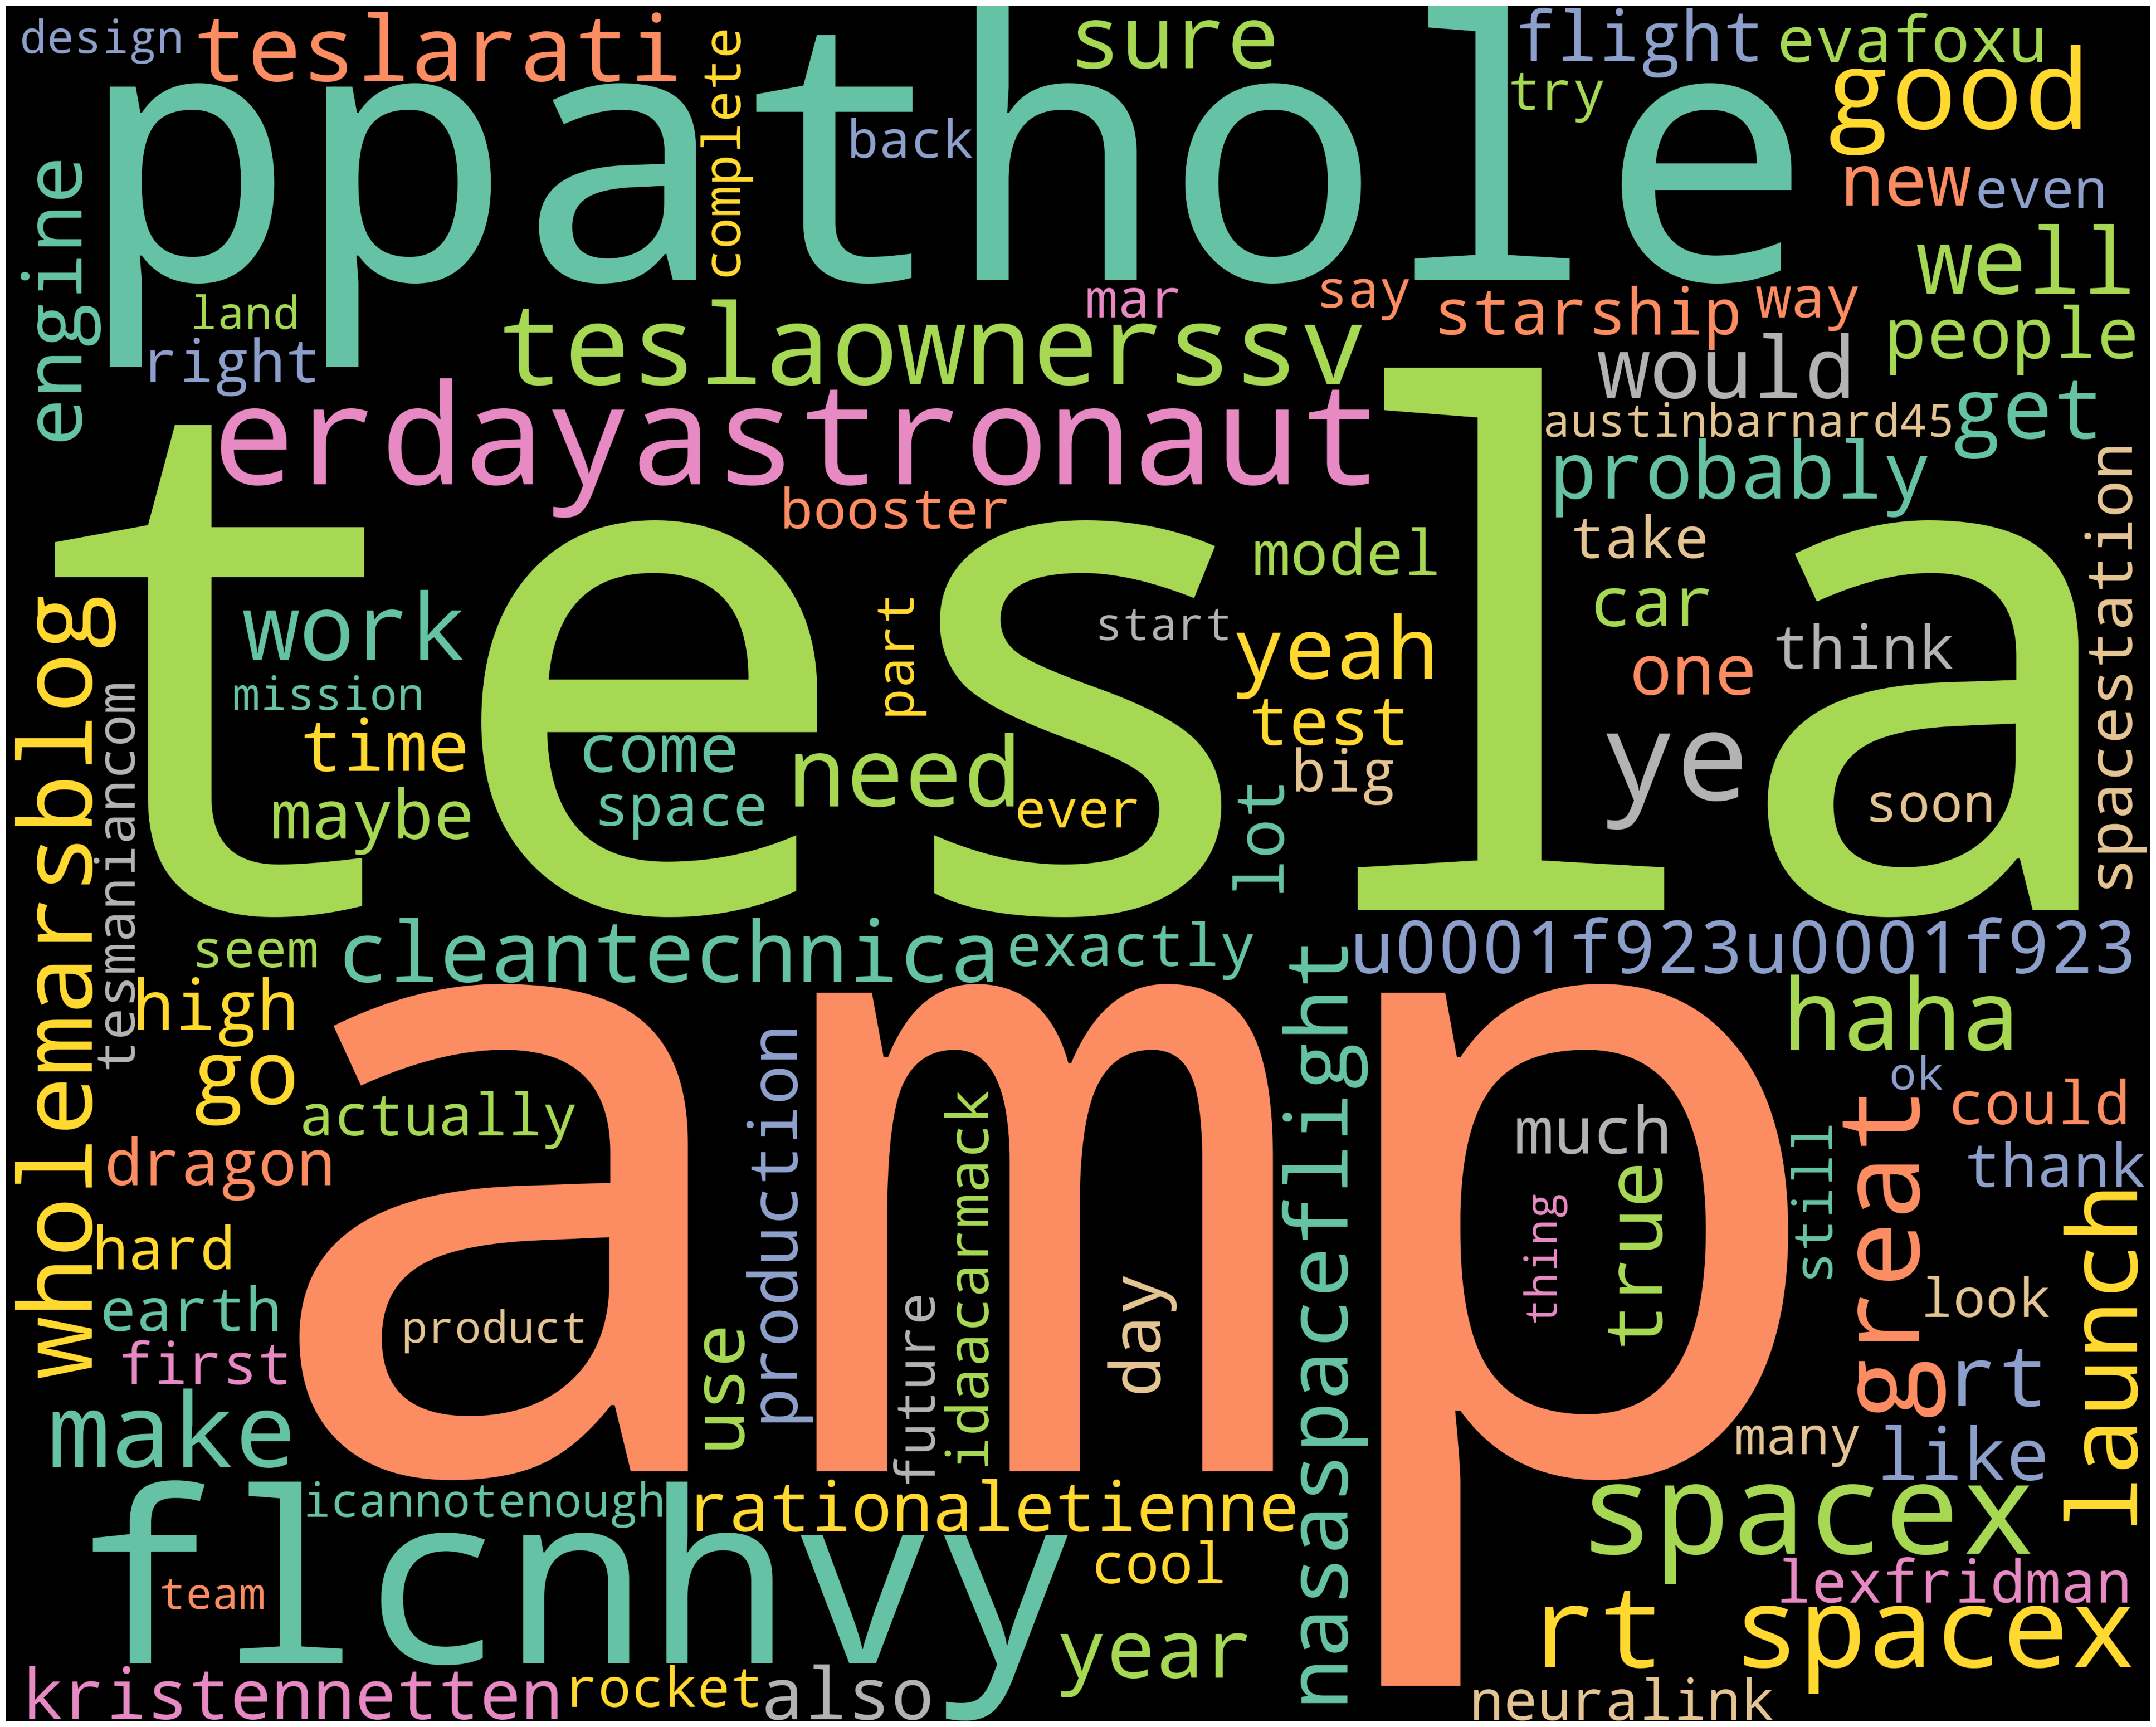

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def plot_cloud(wordcloud):
    plt.figure(figsize=(50,40))
    plt.imshow(wordcloud)
    plt.axis('off')

stopword.append('will')
wordcloud = WordCloud(width = 5000, height = 4000, background_color = 'black', max_words=100, colormap = 'Set2', stopwords=stopword).generate(clean_tweets)

plot_cloud(wordcloud)

# Named Entity Recognition(NER)

In [67]:
nlp = spacy.load('en_core_web_sm')
one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter = True)

In [68]:
for token in doc_block:
    print(token, token.pos_)

kunalb11 PROPN
im PROPN
alien PROPN
idaacarmack PROPN
ray PROPN
trace NOUN
cyberpunk NOUN
hdr NOUN
nextlevel NOUN
have AUX
try VERB
joerogan PROPN
spotify VERB
great ADJ
interview NOUN
gtera27 NOUN
doge PROPN
underestimate ADJ
teslacn PROPN
congratulation PROPN
tesla PROPN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
next ADV
even ADV
happy ADJ
new ADJ
year NOUN
ox NOUN
frodo NOUN
underdoge NOUN
all DET
thought NOUN
would AUX
fail VERB
himself PRON
owenspark PROPN
flcnhvy PROPN
anonyx10 PROPN
haha PROPN
thanks PROPN
flcnhvy PROPN
anonyx10 PROPN
indeed ADV
tweet PROPN
definitely ADV
represent VERB
realworld NOUN
time NOUN
allocation NOUN
the DET
entertaining ADJ
outcome NOUN
likely ADV
givedirectly ADV
just ADV
send VERB
just ADV
agree VERB
clubhouse PROPN
kanyewest PROPN
geoffkeighley PROPN
unrealengine PROPN
its PROPN
get VERB
real ADJ
buy NOUN
dogecoin NOUN
lil NOUN
x PUNCT
toddler PROPN
hodler PROPN
joshmanmode PROPN
he PRON
definitely ADV
issue VERB
sentencin

In [69]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

['trace', 'cyberpunk', 'hdr', 'nextlevel', 'try', 'spotify', 'interview', 'gtera27', 'execution', 'year', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'fail', 'represent', 'realworld', 'time', 'allocation', 'outcome', 'send', 'agree', 'get', 'buy', 'dogecoin', 'lil', 'issue', 'sentencing', 'seem', 'bit', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'u0001f923u0001f923', 'power', 'haha', 'wallet', 'give', 'avoid', 'cost', 'freewalletorg', 'app', 'suck', 'spacex', 'launch', 'element', 'gateway', 'mission', 'predict', 'cash', 'flow', 'starlink', 'starlink', 'endeavor', 'spacex', 'need', 'pass', 'cash', 'flow', 'year', 'idaacarmack', 'cost', 'ton', 'carbon', 'sequester', 'value', 'product', 'make', 'scalable', 'adamklotz', 'mean', 'price', 'country', 'difference', 'tax', 'amp', 'shipping', 'tobyliiiiiiiiii', 'intend', 'earth', 'idea', 'apply', 'team', 'manage', 'carbon', 'tesla', 'receive', 'stock', 'comp', 'stockoption', 'take', 'table', 'that\x92s', 'miss', 'work', 'go', 'seem', '

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis = 0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse =True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word','count']
wf_df

word  count
0             spacex    193
1              tesla    100
2     erdayastronaut     83
3               make     64
4             launch     62
...              ...    ...
2203          answer      1
2204        priority      1
2205      propaganda      1
2206           click      1
2207       teslagong      1

[2208 rows x 2 columns]

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

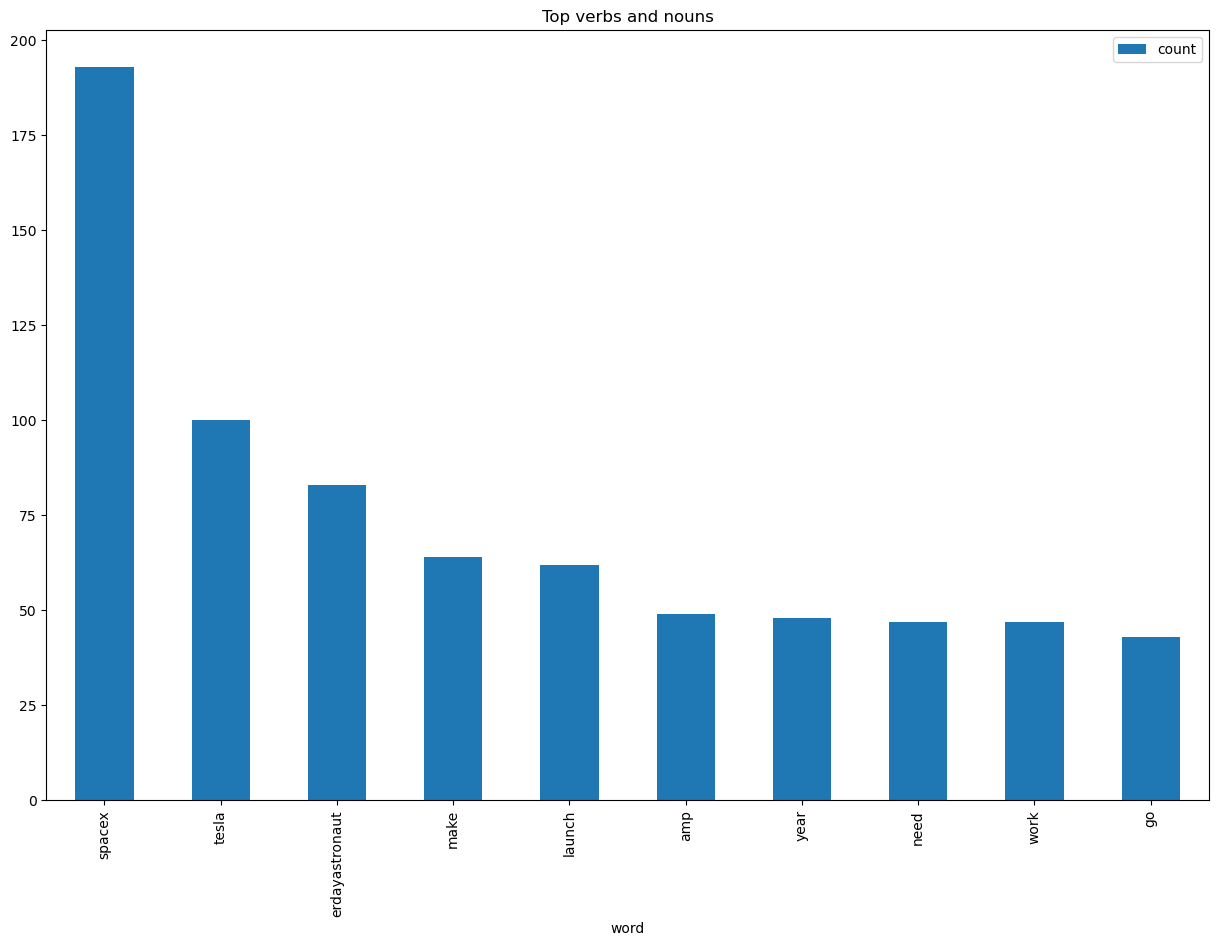

In [74]:
wf_df[0:10].plot.bar(x='word', figsize=(15,10), title = 'Top verbs and nouns')

# Emotionn Mining - Sentiment Analysis

In [75]:
from nltk import tokenize
sentence = tokenize.sent_tokenize(' '.join(musk))
sentence

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [76]:
sent_df = pd.DataFrame(sentence, columns = ['sentence'])
sent_df

sentence
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
919  @kenyanwalstreet Not actually a payout, just a...
920  It may never pay out, as the stock cant b
 ht...
921                                    Details Aug 28.
922  AI symbiosis while u wait @vistacruiser7 @flcn...
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[924 rows x 1 columns]

In [79]:
afinn = pd.read_csv('Afinn.csv', sep = ',', encoding = 'latin-1')
afinn.shape

(2477, 2)

In [81]:
afinn.head()

word  value
0    abandon     -2
1  abandoned     -2
2   abandons     -2
3   abducted     -2
4  abduction     -2

In [83]:
from matplotlib.pyplot import imread
%matplotlib inline


In [85]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [87]:

sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [88]:
calculate_sentiment(text = 'amazing')

4

In [89]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [90]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [91]:
sent_df.sort_values(by='sentiment_value').tail(10)

sentence  sentiment_value  \
817  Might be able to
 https://t.co/FB7e5nOq2E @Pri...               11   
224  @PPathole @karpathy For a second there, I thou...               11   
159  @harsimranbansal @heydave7 It will most likely...               11   
184  Also, w
 https://t.co/IYdKttVsqk @cleantechnic...               12   
645  Its
 https://t.co/IxhyT6NuiC @Teslarati Tesla...               13   
81   @teslaownersSV This is a good one @MrBeastYT I...               13   
585  The open areas
 https://t.co/rabjKrtQlw @Sav...               14   
105  @Erdayastronaut @SpaceX Was also thinking that...               16   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               16   
719  We just havent observed the
 https://t.co/mez...               17   

     word_count  
817          72  
224          69  
159          93  
184          98  
645          65  
81           38  
585         138  
105          94  
36          231  
719          72

In [93]:
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.352814
std        2.692026
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [98]:
sent_df[sent_df['sentiment_value']>=15].head()

sentence  sentiment_value  \
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               16   
105  @Erdayastronaut @SpaceX Was also thinking that...               16   
719  We just havent observed the
 https://t.co/mez...               17   

     word_count  
36          231  
105          94  
719          72

In [99]:
sent_df['index'] = range(0,len(sent_df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

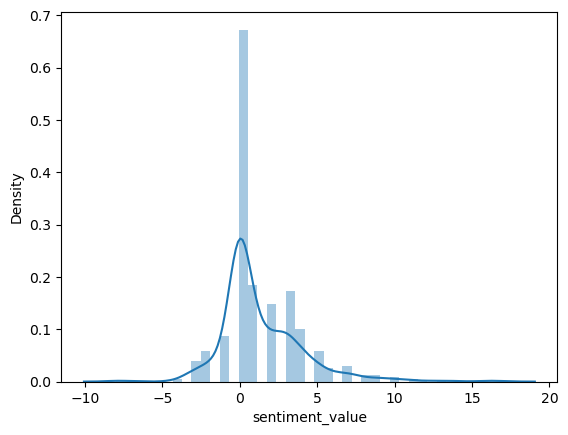

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

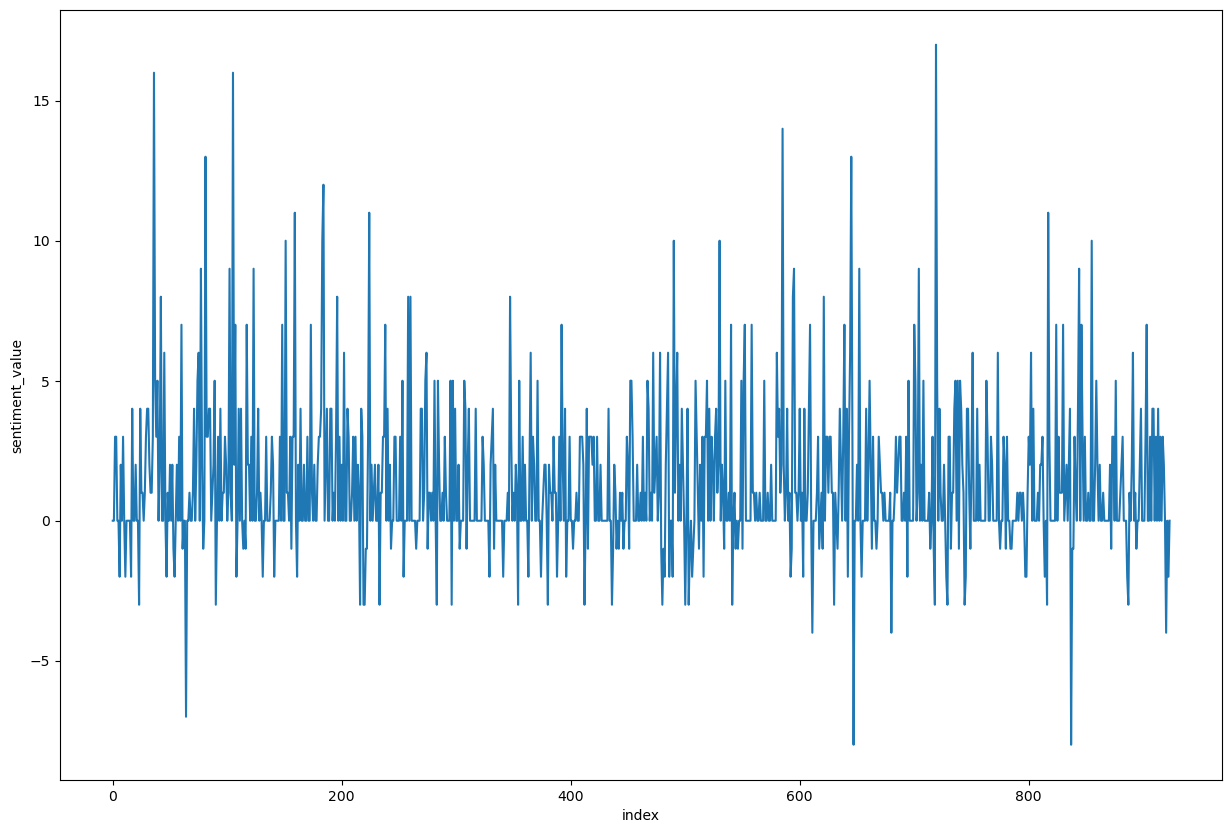

In [102]:
plt.figure(figsize = (15,10))
sns.lineplot(y='sentiment_value', x='index', data =sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

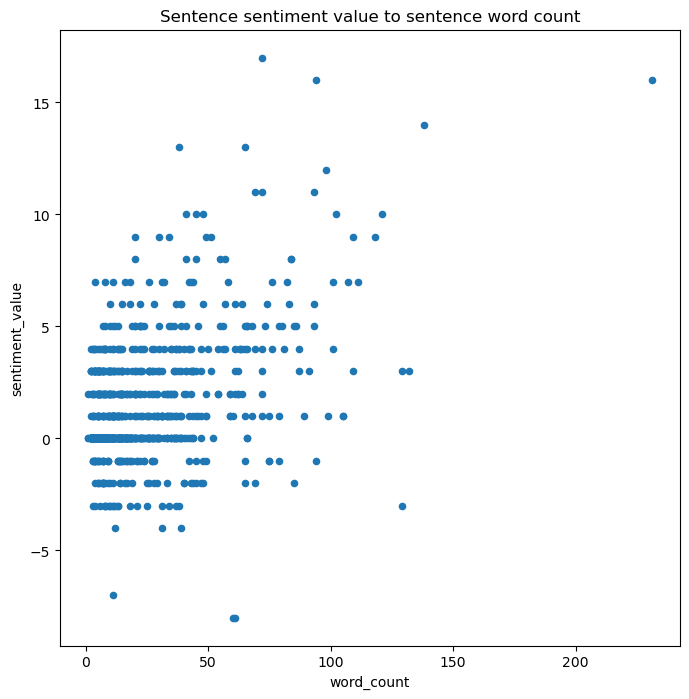

In [103]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')